## Problem Statement
### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

### The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

### Step 1: reading and understanding the data

#### importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd

# To display all the rows of pandas dataframe without skipping any 
#while printing
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

import matplotlib.pyplot as plt
import seaborn as sns

# to supress warnings
import warnings
warnings.filterwarnings('ignore')

#### reading the data set

In [2]:
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### summary of the data set

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### checking shape of the data

In [4]:
housing.shape

(1460, 81)

#### checking the quatiles of the data

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# ID column does not add to analysis so we can drop it here
housing.drop(['Id'], axis=1, inplace=True)

#### checking the number of null entries

In [7]:
(housing.isnull().sum()/(len(housing.index)))*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

### Step 2: cleaning the data

#### we can build a new column here as age of house as we have year sold and year build and remove the original columsn

In [8]:
# Age of the house 
housing['AgeHouse'] = housing['YrSold'] - housing['YearBuilt']

housing.drop(['YrSold','YearBuilt'], axis=1, inplace=True)

In [9]:
# Since we have already added information about year built and year sold we can remove Month Sold. we can also remove 
# 'YearRemodAdd', 'GarageYrBlt' as these don't seem to add much to our analysis as we have already included age information

housing.drop(['MoSold','YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

#### handling missing values

In [10]:
(housing.isnull().sum()/(len(housing.index)))*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
Heating           0.000000
H

#### from the data dictionary we can see that NA for some categorical variables means absence of that service, so we impute the data accordingly

In [11]:
housing['Alley'] = housing['Alley'].fillna('No Alley')
housing['BsmtQual'] = housing['BsmtQual'].fillna('No Basement')
housing['BsmtCond'] = housing['BsmtCond'].fillna('No Basement')
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('No Basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('No Basement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('No Basement')
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('No Fireplace')
housing['GarageType'] = housing['GarageType'].fillna('No Garage')
housing['GarageFinish'] = housing['GarageFinish'].fillna('No Garage')
housing['GarageQual'] = housing['GarageQual'].fillna('No Garage')
housing['GarageCond'] = housing['GarageCond'].fillna('No Garage')
housing['PoolQC'] = housing['PoolQC'].fillna('No Pool')
housing['Fence'] = housing['Fence'].fillna('No Fence')
housing['MiscFeature'] = housing['MiscFeature'].fillna('No MiscFeature')

In [12]:
# checking remaining missing values
(housing.isnull().sum()/(len(housing.index)))*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
Heating           0.000000
H

#### Let us impute LotFrontage

In [13]:
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

#### The median and mean are almost same, however there is a steep jump from 75th quartile to max value, and hence there may be some outliers in the data, we impute this column with it's median.

In [14]:
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].describe()[5])

In [15]:
housing['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [16]:
# checking missing values for MasVnrArea

housing['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

#### the mean and standard deviation are too far apart, also min and max are heavily separated so instead of imputing we can drop these values.

In [17]:
housing = housing[~np.isnan(housing['MasVnrArea'])]

In [18]:
# Treating missing values for Electrical column
# Let us check the count for values in Electrical 
housing['Electrical'].value_counts()

SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [19]:
# we can impute missing values for Electrical column iwth mode
housing['Electrical'] = housing['Electrical'].fillna('SBrkr')

In [20]:
(housing.isnull().sum()/(len(housing.index)))*100

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath     

#### MSSubClass, OverallQual and OverallCond are categorical columns but in the original dataset the types of these columns are numeric. Hence converting these columns to categorical.

In [21]:
# Converting column type for categorical variable from numeric to object
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['OverallQual'] = housing['OverallQual'].astype('object')
housing['OverallCond'] = housing['OverallCond'].astype('object')

In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1452 non-null   object 
 1   MSZoning       1452 non-null   object 
 2   LotFrontage    1452 non-null   float64
 3   LotArea        1452 non-null   int64  
 4   Street         1452 non-null   object 
 5   Alley          1452 non-null   object 
 6   LotShape       1452 non-null   object 
 7   LandContour    1452 non-null   object 
 8   Utilities      1452 non-null   object 
 9   LotConfig      1452 non-null   object 
 10  LandSlope      1452 non-null   object 
 11  Neighborhood   1452 non-null   object 
 12  Condition1     1452 non-null   object 
 13  Condition2     1452 non-null   object 
 14  BldgType       1452 non-null   object 
 15  HouseStyle     1452 non-null   object 
 16  OverallQual    1452 non-null   object 
 17  OverallCond    1452 non-null   object 
 18  RoofStyl

In [23]:
housing.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeHouse
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,69.847796,10507.276171,103.685262,441.970386,46.805785,567.070937,1055.847107,1161.270661,346.944215,5.876722,1514.091598,0.423554,0.057851,1.562672,0.381543,2.867080,1.046143,6.517218,0.612259,1.765152,472.475207,94.416667,46.390496,21.937328,3.428375,15.143939,2.774105,43.728650,180615.063361,36.699036
std,22.036987,9989.563592,181.066207,455.360279,161.726239,442.082927,438.119089,385.018424,436.370724,48.754995,525.627765,0.518782,0.239372,0.550231,0.502664,0.814812,0.219498,1.626065,0.643422,0.748496,214.106397,125.393706,66.048619,61.089879,29.396943,55.899665,40.287389,497.478278,79285.541485,30.242159
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,60.000000,7538.750000,0.000000,0.000000,0.000000,222.500000,794.750000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,327.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000,8.000000
50%,69.000000,9478.500000,0.000000,381.000000,0.000000,477.500000,990.500000,1086.000000,0.000000,0.000000,1461.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162700.000000,35.000000
75%,79.000000,11600.000000,166.000000,706.500000,0.000000,808.000000,1297.250000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.250000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,136.000000


### Step 3: data visualization

#### visualizing categorical variables

In [24]:
# List of categorical columns
category_cols = housing.select_dtypes(include='object').columns
category_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

#### The number of catgorical columns is too huge, we will plot some major ones(from intitution) of them against SalePrice so see the trend

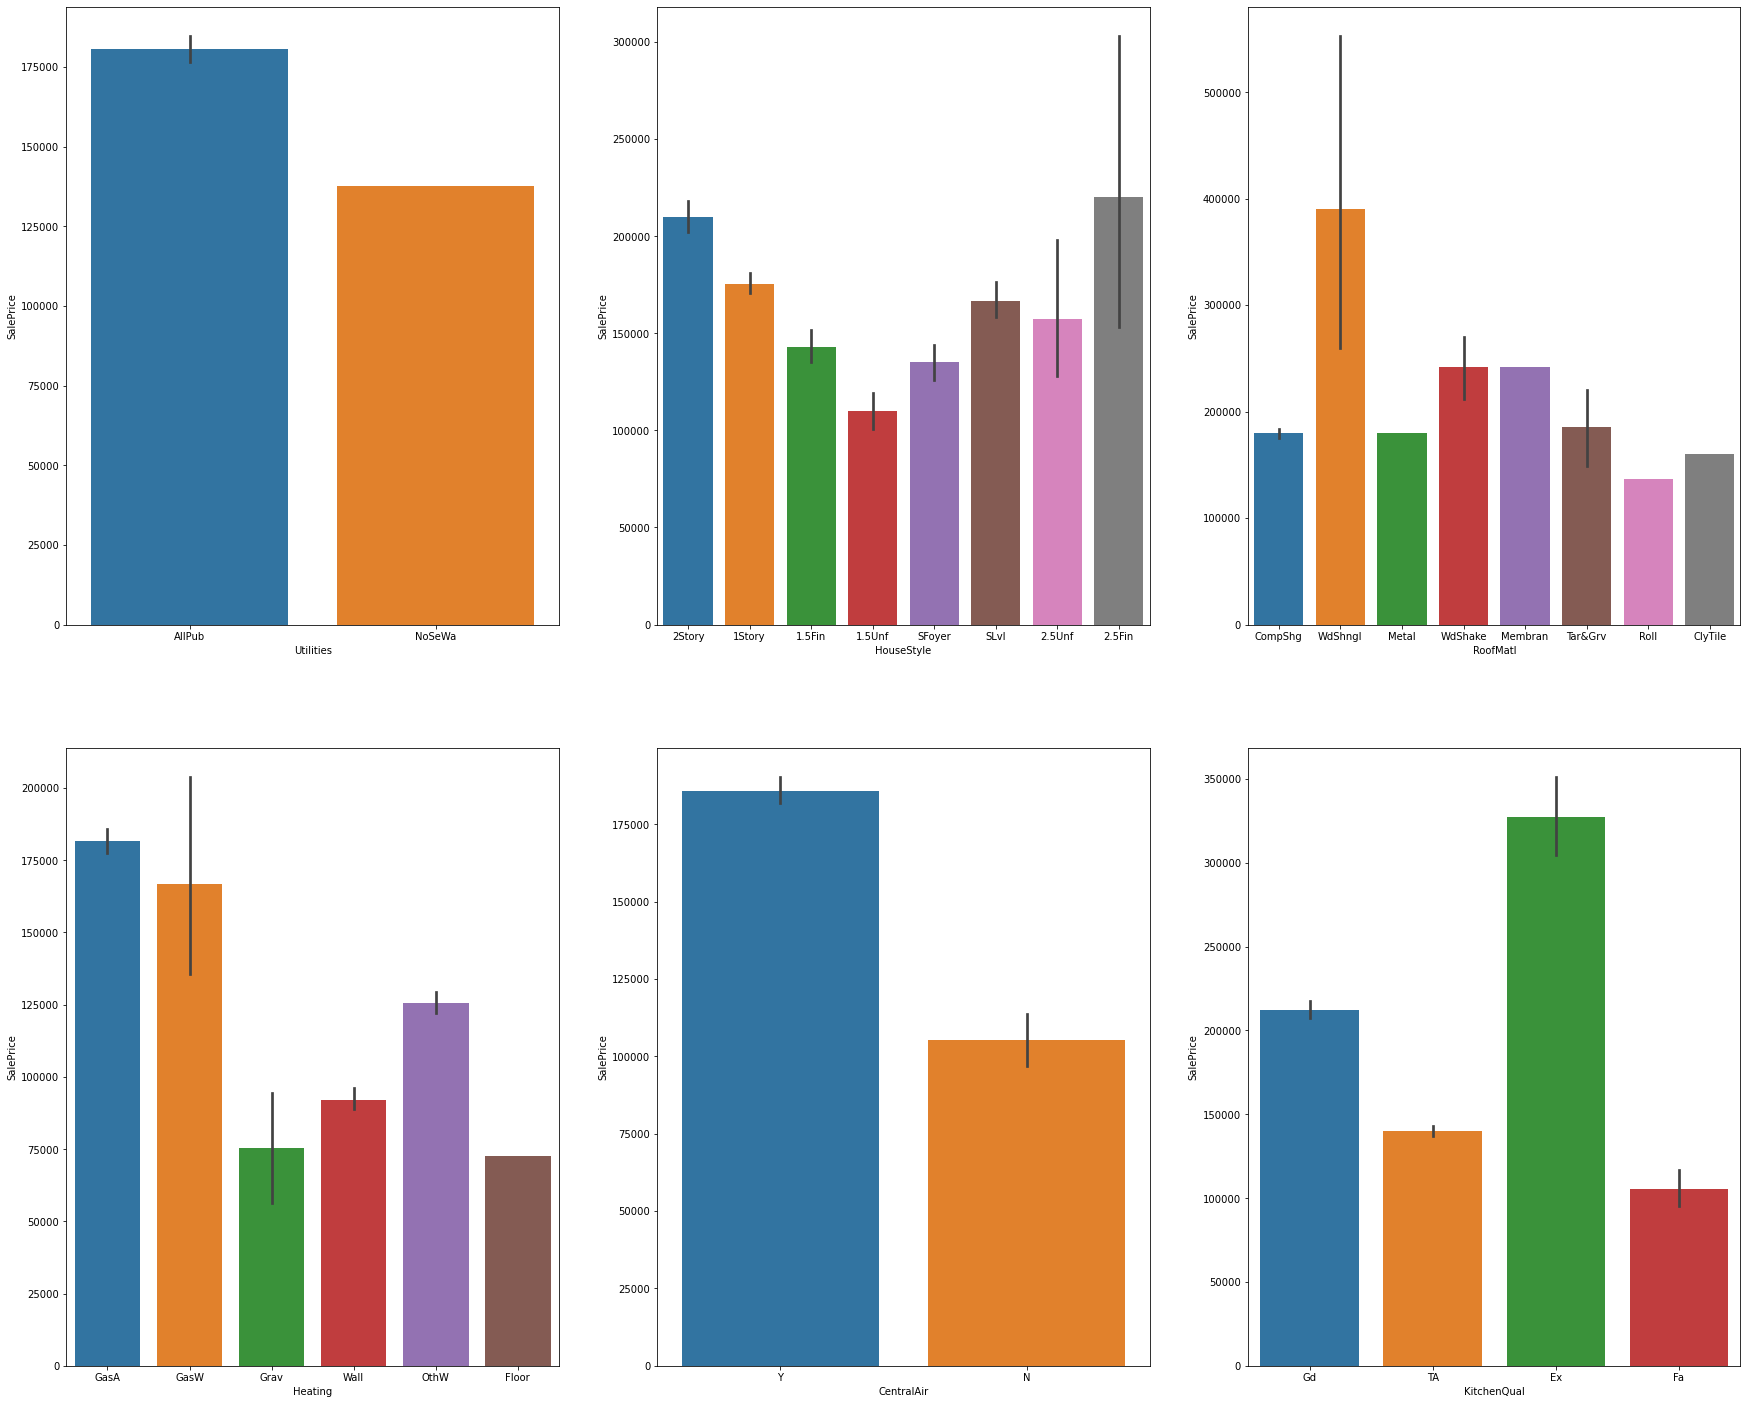

In [25]:
plt.figure(figsize=(30,25))
plt.subplot(2,3,1)
sns.barplot(housing['Utilities'], housing['SalePrice'])
plt.subplot(2,3,2)
sns.barplot(housing['HouseStyle'], housing['SalePrice'])
plt.subplot(2,3,3)
sns.barplot(housing['RoofMatl'], housing['SalePrice'])
plt.subplot(2,3,4)
sns.barplot(housing['Heating'], housing['SalePrice'])
plt.subplot(2,3,5)
sns.barplot(housing['CentralAir'], housing['SalePrice'])
plt.subplot(2,3,6)
sns.barplot(housing['KitchenQual'], housing['SalePrice'])
plt.show()

#### we can draw the following conclusions from above plots
1. Houses having all public utilities have higher total SalePrice
2. Roof Material of wood shilling is more preferred as it slides the snow thereby avoiding water dripping problem
3. Houses having Gas forced warm air furnace have more SalePrice in total, which is evident because of low tempartures and snow in winter
4. Houses having central AC have greater total SalePrice, which is again evident from the fact that during summers heat waves in US can lead to very high temperatures.

#### Let us analyse numerical variables

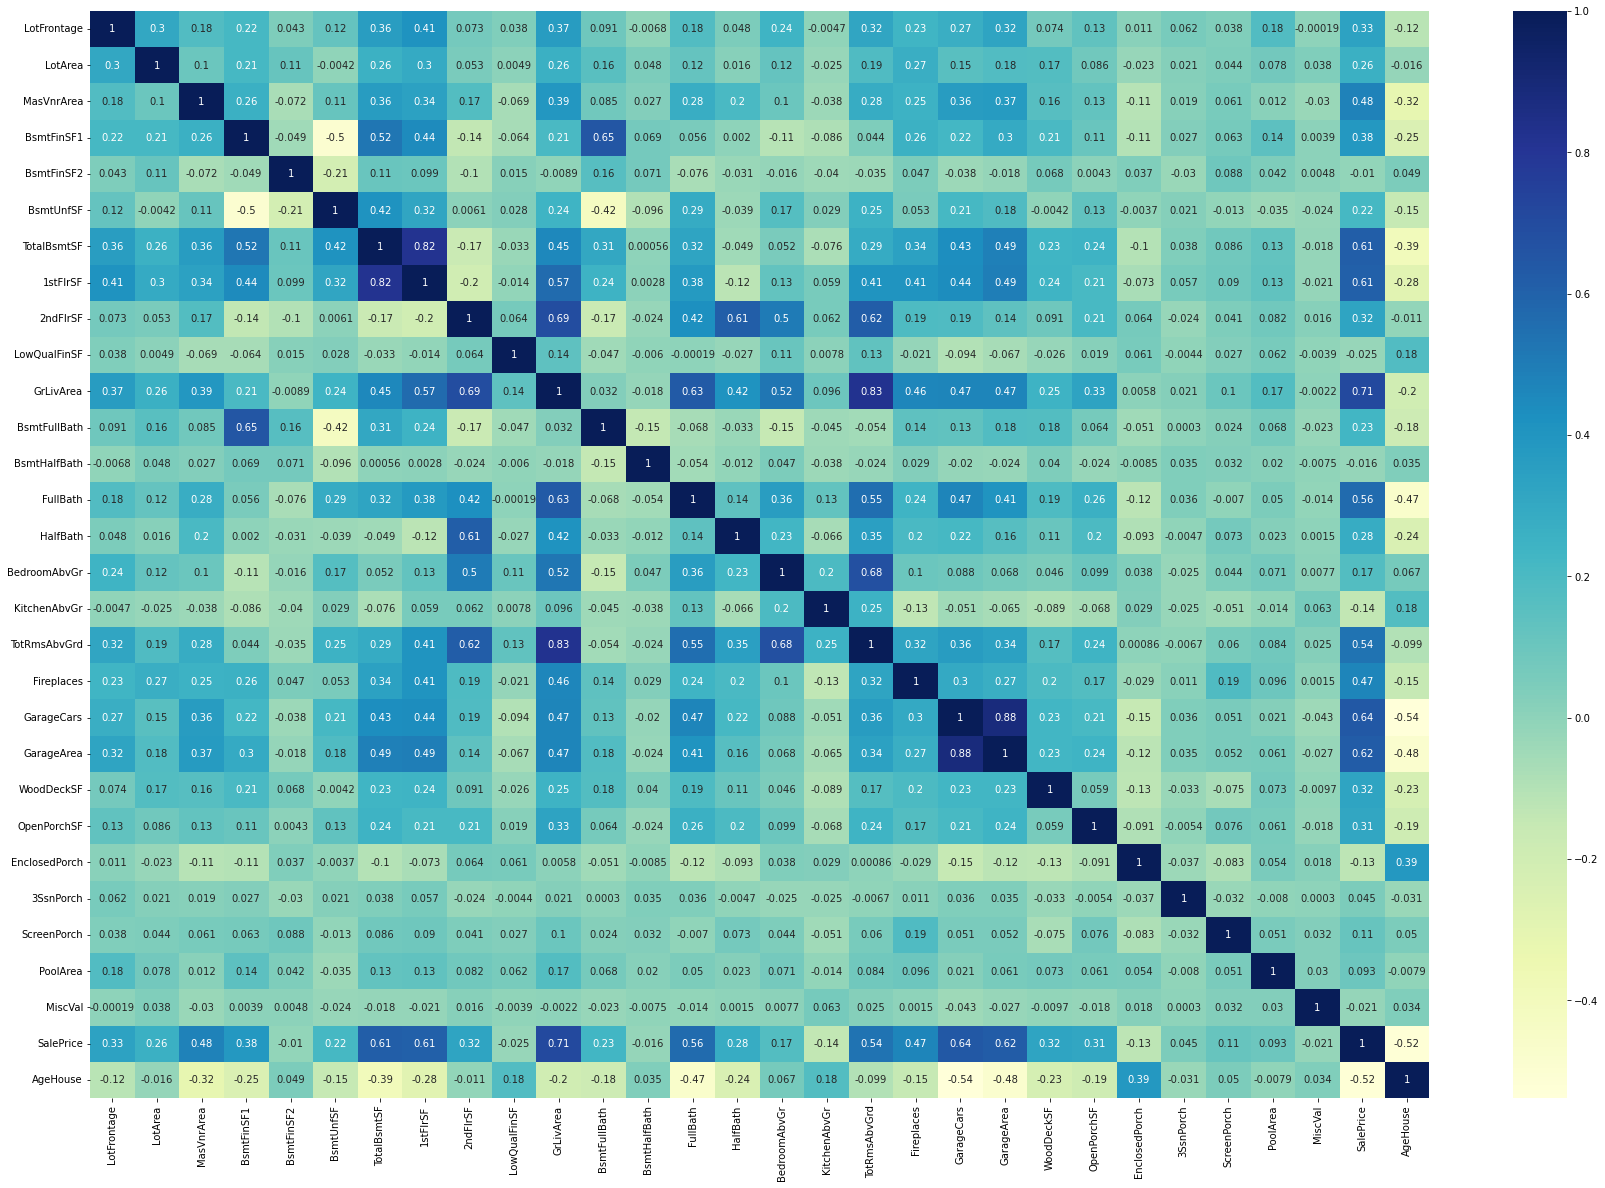

In [26]:
# plotting a heatmap
plt.figure(figsize=(30,20))
sns.heatmap(housing.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [27]:
# Variables more than 0.70 correlations and more than -0.70 correlations
c = housing.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
housing_corr = pd.DataFrame(so)
print("variables with more than 0.70 correlation")
print(housing_corr[(housing_corr[0] < 1) & (housing_corr[0] > 0.7)])
print("variables with more than -0.70 correlation")
print(housing_corr[(housing_corr[0] < -0.70)])

variables with more than 0.70 correlation
                                  0
GarageCars   GarageArea    0.882332
GarageArea   GarageCars    0.882332
TotRmsAbvGrd GrLivArea     0.825476
GrLivArea    TotRmsAbvGrd  0.825476
TotalBsmtSF  1stFlrSF      0.818246
1stFlrSF     TotalBsmtSF   0.818246
SalePrice    GrLivArea     0.710080
GrLivArea    SalePrice     0.710080
variables with more than -0.70 correlation
Empty DataFrame
Columns: [0]
Index: []


#### Let us see how each of these variables are related to SalePrice before dropping them

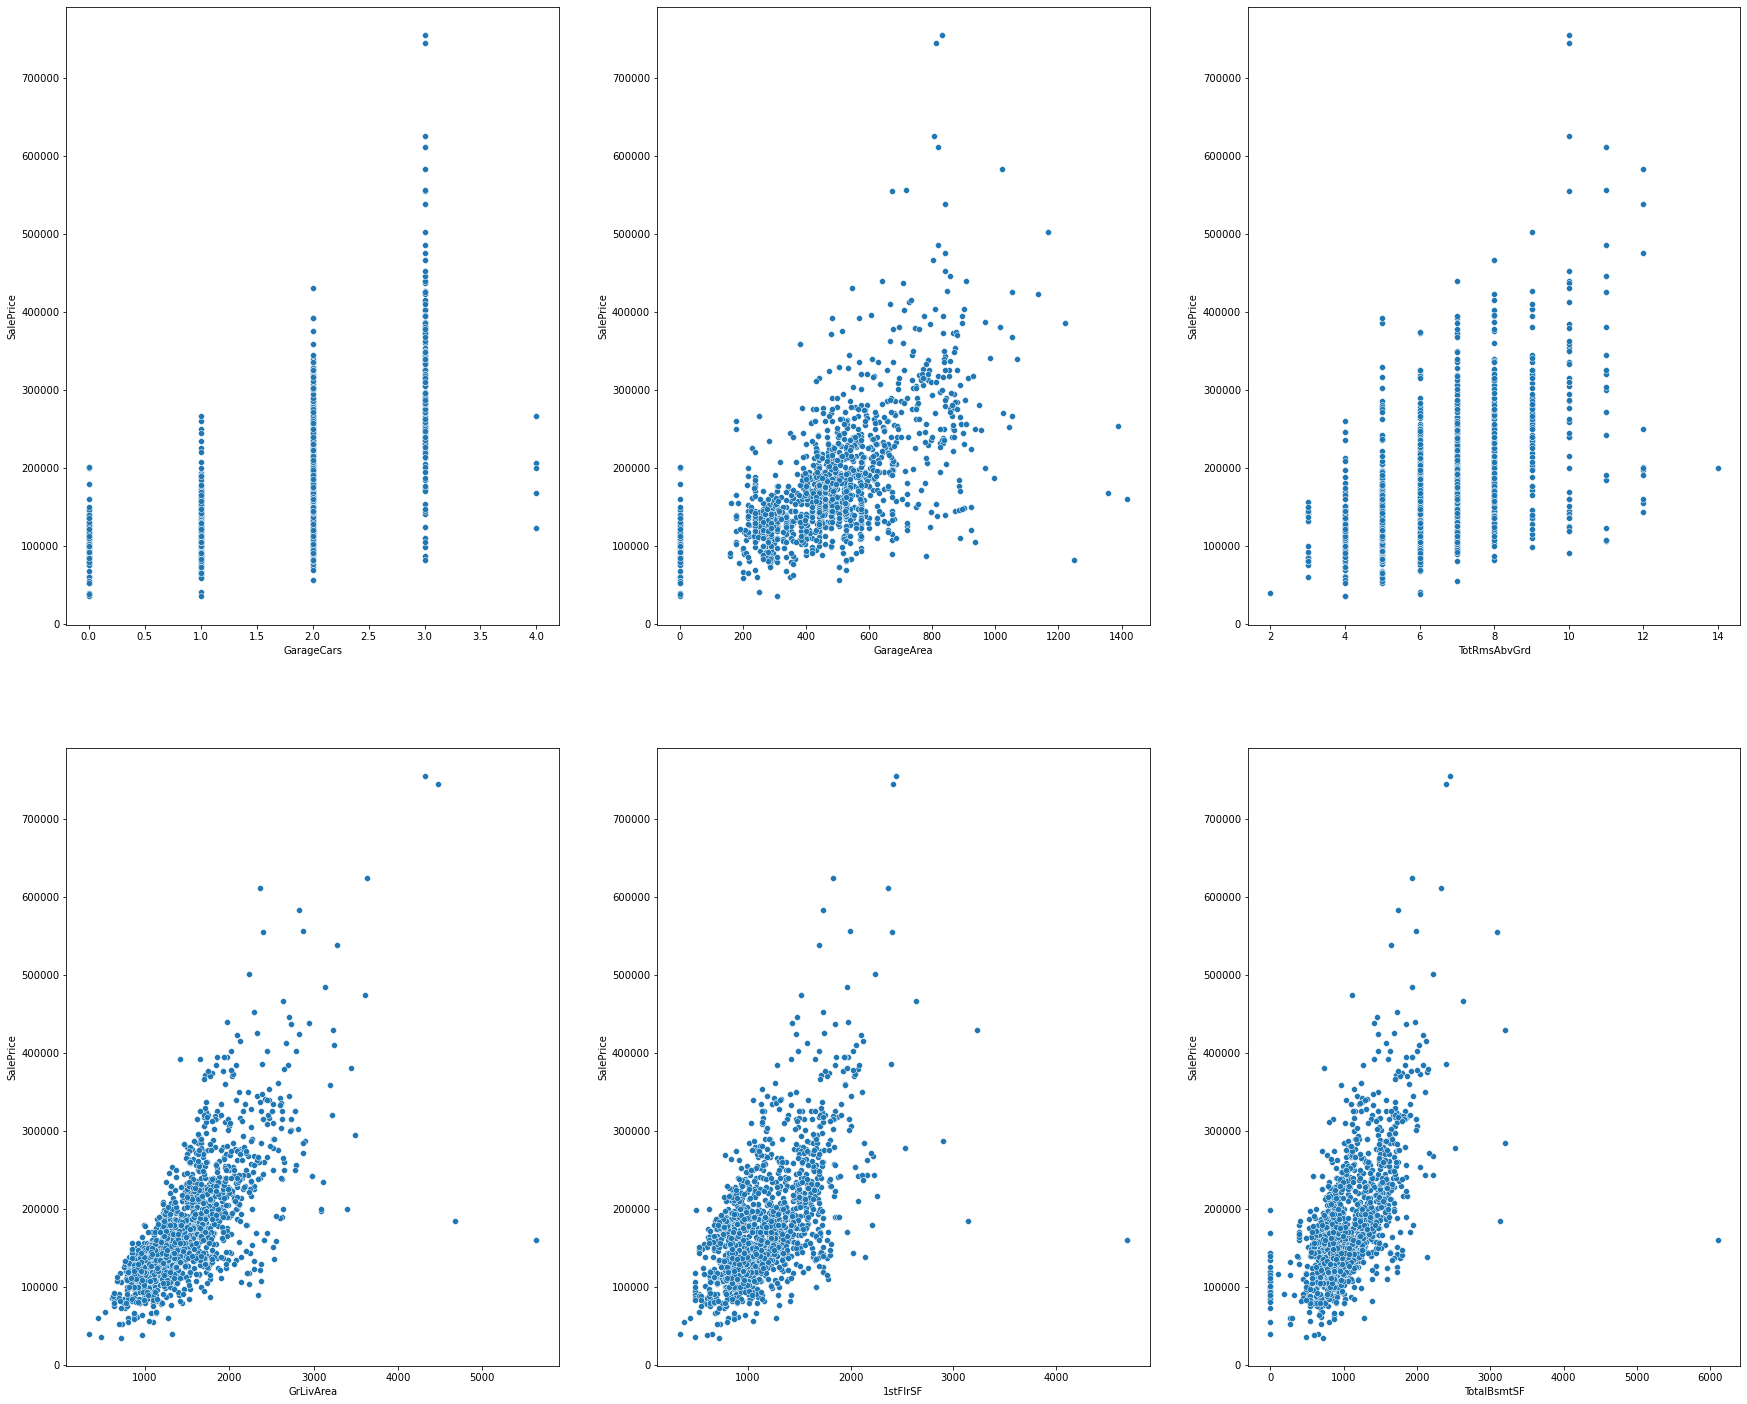

In [28]:
plt.figure(figsize=(30,25))
plt.subplot(2,3,1)
sns.scatterplot(housing['GarageCars'], housing['SalePrice'])
plt.subplot(2,3,2)
sns.scatterplot(housing['GarageArea'], housing['SalePrice'])
plt.subplot(2,3,3)
sns.scatterplot(housing['TotRmsAbvGrd'], housing['SalePrice'])
plt.subplot(2,3,4)
sns.scatterplot(housing['GrLivArea'], housing['SalePrice'])
plt.subplot(2,3,5)
sns.scatterplot(housing['1stFlrSF'], housing['SalePrice'])
plt.subplot(2,3,6)
sns.scatterplot(housing['TotalBsmtSF'], housing['SalePrice'])
plt.show()

#### All of the variables seem to show a somewhat linear trend with SalePrice, however TotRmsAbvGrd shows an increasing and decreasing trend, we can drop this.

In [29]:
housing.drop(['TotRmsAbvGrd'], axis = 1, inplace = True)

#### BedroomAbvGr has too many high correlations(0.6 and above) with other variables, but is not much correlated to price, so we drop this

In [30]:
housing.drop(['BedroomAbvGr'], axis = 1, inplace = True)

#### Let us now remove those catgorical values which have less numer of types in them as these may not capture much variance in SalePrice. we will use intitution to drop these.

In [31]:
housing.drop(['Street','Alley','LandContour','LandSlope','Condition2','BldgType','BsmtCond','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature','SaleType','ExterCond','BsmtFinType2'],
       axis=1, inplace=True)

#### let us now drop some numerical columns based on intitution that may not aid in our analysis

#### we will specifically drop those variables that have low correlation with SalePrice and other variables

In [32]:
housing.drop(['PoolArea', 'ScreenPorch','MiscVal','3SsnPorch','EnclosedPorch','KitchenAbvGr','BsmtHalfBath','LowQualFinSF','BsmtFinSF2'], axis=1, inplace=True)

#### we need to handle the remaining correlated variables while model building, for now we will keep these variables.

### Step 4: data preparation

#### let us first get the names of categorical columns to create dummy variables

In [33]:
# List of categorical columns
category_cols = list(housing.select_dtypes(include='object').columns)
print('List of categorical columns')
print(category_cols)
print()

# Numeric columns list
numeric_cols = list(housing.select_dtypes(include=['int64', 'float64']).columns)
print('List of numerical columns')
print(numeric_cols)

List of categorical columns
['MSSubClass', 'MSZoning', 'LotShape', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition']

List of numerical columns
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'AgeHouse']


In [34]:
len(numeric_cols)

19

In [35]:
housing_dummies = pd.get_dummies(housing[category_cols], drop_first=True)
housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,

In [36]:
# dropping categorical columns
housing.drop(category_cols, axis=1, inplace=True)

In [37]:
# concatenating dummy variables
housing = pd.concat([housing, housing_dummies], axis=1)

In [38]:
housing.shape

(1452, 207)

#### now we perform train test split

In [39]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [40]:
# performing the split
housing_train, housing_test = train_test_split(housing, train_size=0.7, random_state=100)

In [41]:
# checking dimensions
print(housing_train.shape)
print(housing_test.shape)

(1016, 207)
(436, 207)


#### we need to scale the original numeric columns present in housing_train and housing_test before applying regularization

#### here we use min max scaling

In [42]:
# importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [43]:
# instantiating object
scaler = MinMaxScaler()

In [44]:
housing_train[numeric_cols] = scaler.fit_transform(housing_train[numeric_cols])
housing_test[numeric_cols] = scaler.transform(housing_test[numeric_cols])

In [45]:
y_train = housing_train.pop('SalePrice')
X_train = housing_train
y_test = housing_test.pop('SalePrice')
X_test = housing_test

### Step 5 Model Building and Evaluation

In [46]:
# importing necessary models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#### first performing linear regression

In [47]:
# instantiate
lm = LinearRegression()
# fit
lm.fit(X_train, y_train)

LinearRegression()

In [48]:
# printing betas and intercept
print(lm.coef_)
print()
print(lm.intercept_)

[ 4.23991137e-02  7.12968176e-02  8.96162493e-03  2.18834806e-02
 -9.32841623e-03  1.15233202e-01  7.49602228e-02  1.12764856e-01
  8.00406624e-02  2.73318212e-02  2.87547827e-02  1.63157719e-02
  4.59772211e-02  4.45199583e-02  1.23503263e-02  1.50495611e-02
 -1.68829985e-02 -4.72005552e-02 -1.06834677e-02 -1.92368890e-03
  2.40557037e-02  7.30275967e-03  9.34140187e-03  8.52236814e-03
  1.41862711e-02 -3.21892552e-02 -2.18609110e-02 -2.54597610e-02
 -2.23666918e-02 -2.12366351e-02 -3.41321366e-02 -1.42746227e-02
  6.27622355e-02  4.01356103e-02  4.30993320e-02  4.00947023e-02
  1.38608627e-02  2.35813274e-02  2.00708362e-03 -6.19010964e-02
  1.59409210e-02 -1.15407763e-02 -4.07046679e-02 -2.33904383e-03
  7.67378895e-03  1.32753200e-02 -2.00328000e-03 -5.59416386e-03
 -4.59215302e-03  3.35724872e-02 -2.57154878e-02 -4.71601427e-03
 -6.27973908e-03 -7.62517677e-03 -1.60393249e-02 -1.11390818e-02
  2.10505518e-02 -1.12628775e-02  5.52281459e-02  2.86919422e-02
 -1.85373319e-02 -1.47771

#### evaluating linear regression

In [49]:
# importing scoring metrics
from sklearn.metrics import r2_score, mean_squared_error

In [50]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9152324124051585
-2.390492236073643e+21
1.0330338225763833
1.4104362289302564e+22
0.001016765573401952
3.2349454791978357e+19


#### as we can see here train accuracy is very high and test accuracy is too poor. clearly there is overfitting. Let us proceed with ridge and lasso regression

#### Ridge regression

In [51]:
#importing GridSearchCv for Ridge and Lasso
from sklearn.model_selection import GridSearchCV

In [52]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [54]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.67242342e-02  2.60126466e-02  2.14671705e-02  4.13754502e-02
  1.81805498e-02  5.90549015e-02  6.36941705e-02  5.97057802e-02
  6.95542400e-02  2.36767565e-02  3.63964325e-02  2.25335361e-02
  3.45948208e-02  3.40743085e-02  2.37971073e-02  1.73173087e-02
 -3.39734602e-03 -2.00137150e-02 -1.56763055e-02  1.35401663e-03
  5.13815912e-03  5.13347555e-03  1.20290474e-02  6.68506499e-03
  8.71291576e-03 -3.91906806e-03 -7.19038728e-03 -1.30749355e-02
 -2.17494950e-02 -1.71793561e-02 -8.53231453e-03 -9.92494485e-03
  1.60528394e-02  6.25990852e-03  8.87390494e-03  2.56969604e-03
  1.17223450e-02  1.76435241e-02 -4.16931556e-04 -4.15170179e-03
  1.42815487e-02 -9.60811570e-03 -1.26665759e-02 -2.91106636e-03
  1.01680719e-04  2.81630199e-03 -1.22503937e-03 -1.04917666e-03
 -8.03278909e-03  3.01927541e-02 -2.19645054e-02 -9.67616403e-03
 -1.18800744e-02 -1.58397622e-02 -1.69646993e-02 -1.13205000e-02
  5.37025480e-03 -1.04923822e-02  5.04924512e-02  2.45627245e-02
 -1.53927100e-02 -1.22375

In [55]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9070996677560677
0.8049835308487205
1.1321448216181826
1.1506345395239785
0.0011143157693092349
0.0026390700447797674


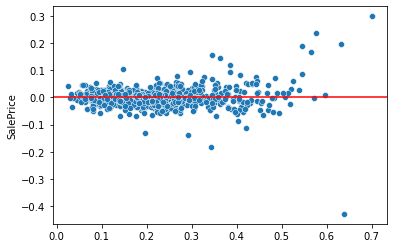

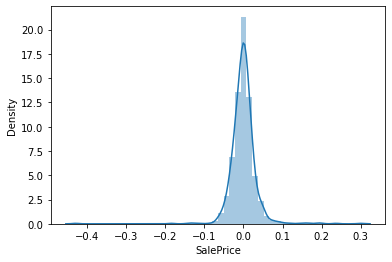

In [56]:
#### performing residual analysis

res = y_train - y_pred_train

sns.scatterplot(y_pred_train, res)
plt.axhline(y=0,color='red')
plt.show()

sns.distplot(res)
plt.show()

#### y_pred vs error terms plot shows that errors are centered around zero and are randomly distributed, however there is minor variation as we move towards right, we ignore that for now. our assumptions hold true in case of ridge regression, so we can safely interpret the coefficients

#### Lasso

In [57]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [59]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [60]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.906919916919054
0.8016066457792375
1.1343353840671102
1.1705588085555132
0.0011164718347117227
0.0026847679095309937


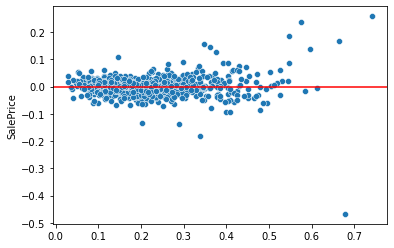

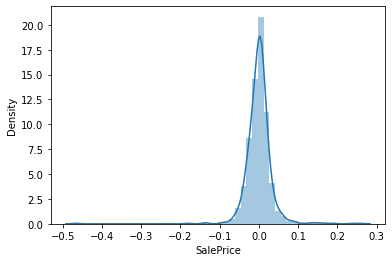

In [61]:
#### performing residual analysis

res = y_train - y_pred_train

sns.scatterplot(y_pred_train, res)
plt.axhline(y=0,color='red')
plt.show()

sns.distplot(res)
plt.show()

#### y_pred vs error terms plot shows that errors are centered around zero and are randomly distributed, however there is minor variation as we move towards right, we ignore that for now. our assumptions hold true in case of lasso regression, so we can safely interpret the coefficients

In [62]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.152324e-01,0.907100,0.906920
1,R2 Score (Test),-2.390492e+21,0.804984,0.801607
2,RSS (Train),1.033034e+00,1.132145,1.134335
3,RSS (Test),1.410436e+22,1.150635,1.170559
4,MSE (Train),3.188676e-02,0.033381,0.033414
5,MSE (Test),5.687658e+09,0.051372,0.051815


### Let us observe changes in betas after regularization

In [63]:
betas = pd.DataFrame(index=X_train.columns)
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [64]:
betas

,Linear,Ridge,Lasso
LotFrontage,4.239911e-02,0.026724,0.022655
LotArea,7.129682e-02,0.026013,0.046285
MasVnrArea,8.961625e-03,0.021467,0.009144
BsmtFinSF1,2.188348e-02,0.041375,0.031721
BsmtUnfSF,-9.328416e-03,0.018181,-0.000000
TotalBsmtSF,1.152332e-01,0.059055,0.111546
1stFlrSF,7.496022e-02,0.063694,0.034723
2ndFlrSF,1.127649e-01,0.059706,0.064138
GrLivArea,8.004066e-02,0.069554,0.148025
BsmtFullBath,2.733182e-02,0.023677,0.020652


### Features selected by lasso regression

In [65]:
betas[betas['Lasso'] != 0]

,Linear,Ridge,Lasso
LotFrontage,4.239911e-02,0.026724,0.022655
LotArea,7.129682e-02,0.026013,0.046285
MasVnrArea,8.961625e-03,0.021467,0.009144
BsmtFinSF1,2.188348e-02,0.041375,0.031721
TotalBsmtSF,1.152332e-01,0.059055,0.111546
1stFlrSF,7.496022e-02,0.063694,0.034723
2ndFlrSF,1.127649e-01,0.059706,0.064138
GrLivArea,8.004066e-02,0.069554,0.148025
BsmtFullBath,2.733182e-02,0.023677,0.020652
FullBath,2.875478e-02,0.036396,0.016568


In [66]:
# to extract the top 5 features
betas['Lasso_abs'] = betas['Lasso'].abs()

In [67]:
betas.sort_values(by='Lasso_abs', ascending = False).head()

,Linear,Ridge,Lasso,Lasso_abs
GrLivArea,8.004066e-02,0.069554,0.148025,0.148025
OverallQual_10,-5.120807e+10,0.064796,0.119442,0.119442
TotalBsmtSF,1.152332e-01,0.059055,0.111546,0.111546
OverallQual_9,-5.120807e+10,0.051887,0.094243,0.094243
2ndFlrSF,1.127649e-01,0.059706,0.064138,0.064138


### Conclusions

1. As we can see from final_metric data frame both ridge and lasso regression give similar results, however ridge gives slightly better results than lasso regression in terms of both train and test accuracy.
2. We will go with Lasso Model as it removes some of the coefficients by making them zero, this make interpretability easier.

#### Some of the varibales which are significant in predicting the price of the house are

1. Total Basement Square Feet Area(TotalBsmtSF), as this increases the SalePrice of house increases.
2. Above grade (ground) living area square feet(GrLivArea), as this increases SalePrice of house increases
3. Excellent OverallQual(OverallQual_10) increases the SalePrice of the house
4. Duplex houses(MSSubClass_90), these lead to lesser SalePrice.
5. Typical or average(KitchenQual_TA) leads to lower SalePrice
6. Below Average or Fair condition of the house(OverallCond_3), leads to lower SalePrice
7. Typical Basement Quality(BsmtQual_TA) leads to lower SalePrice
8. 2nd Floor Sqaure Feet Area(2ndFlrSF), as this increases SalePrice increases, beacuse people tend to like higher floor for better view and more floors in a house means more space that can be rented out, and as area of 2ndFloor increases this increases SalePrice.

# Subjective Question

## Building Ridge and Lasso Regression for subjective Questions with twice the value of alpha

In [68]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [69]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)

0.8992787732085787
0.8067443192631318
1.2274554093038335
1.140245550454324
0.0012081254028581039
0.002615242088197991


In [70]:
alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)

0.899105282775688
0.8046737005669793
1.2295696783323002
1.152462597559864
0.001210206376311319
0.0026432628384400548


In [72]:
betas = pd.DataFrame(index=X_train.columns)
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [73]:
betas['Lasso_abs'] = betas['Lasso'].abs()

In [74]:
betas['Ridge_abs'] = betas['Ridge'].abs()

In [75]:
# top 5 features in case of Lasso
betas.sort_values('Lasso_abs', ascending=False).head()

,Linear,Ridge,Lasso,Lasso_abs,Ridge_abs
GrLivArea,8.004066e-02,0.059185,0.207620,0.207620,0.059185
OverallQual_10,-5.120807e+10,0.053183,0.120578,0.120578,0.053183
TotalBsmtSF,1.152332e-01,0.051852,0.112322,0.112322,0.051852
OverallQual_9,-5.120807e+10,0.046703,0.099323,0.099323,0.046703
Neighborhood_NoRidge,5.522815e-02,0.045869,0.054712,0.054712,0.045869


In [76]:
# top 5 features in case of Ridge
betas.sort_values('Ridge_abs', ascending=False).head()

,Linear,Ridge,Lasso,Lasso_abs,Ridge_abs
GrLivArea,8.004066e-02,0.059185,0.207620,0.207620,0.059185
1stFlrSF,7.496022e-02,0.056399,0.000000,0.000000,0.056399
OverallQual_10,-5.120807e+10,0.053183,0.120578,0.120578,0.053183
TotalBsmtSF,1.152332e-01,0.051852,0.112322,0.112322,0.051852
2ndFlrSF,1.127649e-01,0.047241,0.027341,0.027341,0.047241


### Building the model excluding 5 most important predictor variables

In [77]:
X_train.drop(['GrLivArea','OverallQual_10','TotalBsmtSF','OverallQual_9','2ndFlrSF'], axis=1, inplace=True)
X_test.drop(['GrLivArea','OverallQual_10','TotalBsmtSF','OverallQual_9','2ndFlrSF'], axis=1, inplace=True)

In [78]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
model_cv.best_params_

{'alpha': 0.0001}

In [80]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [81]:
beta1 = pd.DataFrame()
beta1['Features'] = X_train.columns
beta1['Lasso'] = lasso.coef_

In [82]:
beta1

,Features,Lasso
0,LotFrontage,0.040008
1,LotArea,0.052341
2,MasVnrArea,0.027325
3,BsmtFinSF1,0.064215
4,BsmtUnfSF,0.037416
5,1stFlrSF,0.159902
6,BsmtFullBath,0.022073
7,FullBath,0.054683
8,HalfBath,0.033861
9,Fireplaces,0.038320


In [83]:
beta1['Lasso_abs'] = beta1['Lasso'].abs()

In [84]:
beta1.sort_values(by='Lasso_abs', ascending = False).head()

,Features,Lasso,Lasso_abs
5,1stFlrSF,0.159902,0.159902
81,OverallQual_3,-0.084947,0.084947
83,OverallQual_5,-0.077422,0.077422
82,OverallQual_4,-0.076534,0.076534
84,OverallQual_6,-0.074994,0.074994
